# Temel İstatistik Becerileri

## İçindekiler

* [Gerekli Kütüphanelerin Yüklenmesi](#kutuphane)


* [Merkezi Eğilim Ölçüleri](#merkezi)
    * [Aritmetik Ortalama](#aritmetik)
    * [Medyan, Ortanca](#medyan)
    * [Mod Tepe, Değer](#mod)
    * [Kartiller, Dörde Bölenler](#kartiller)


* [Dağılım Ölçüleri](#dagilimolculeri)
    * [Ranj, Değişim Aralığı](#ranj)
    * [Standart Sapma](#std)
    * [Varyans](#varyans)
    * [Çarpıklık](#carpiklik)
    * [Basıklık](#basiklik)
    

* [Dağılım İlişkileri ve Betimsel İstatistik](#dagilimiliskileri)
    * [Korelasyon](#korelasyon)
    * [Kovaryans](#kovaryans)
    * [Güven Aralığı](#guven)


* [Kitle Analizi](#kitle)
    * [Popülasyon, Ana Kitle](#popülasyon)
    * [Örneklem](#orneklem)
    * [Merkezi Limit Teoremi Örnek](#merkezilimit)
    * [Gözlem Birimi ve Öznitelik(Değişken)](#gozlem)


# Gerekli Kütüphaneleri Yükleme <a id='kutuphane'></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Merkezi Eğilim Ölçüleri <a id='merkezi'></a>

## Aritmetik Ortalama <a id='aritmetik'></a>

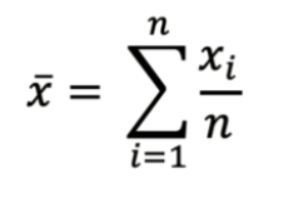

Hepimizin bildiği aritmetik ortalama formülünü python ile fonksiyon olarak implemente edelim.

Maaşları barındıran bir liste oluşturalım.

In [2]:
salaries = [5000, 4500, 4800, 5300, 4600, 5900, 15000, 5700, 5300, 5500]

Bu listeyi yazdıralım.

In [3]:
print(salaries)

[5000, 4500, 4800, 5300, 4600, 5900, 15000, 5700, 5300, 5500]


Listenin kaç elemandan oluştuğunu gözlemleyelim.

In [4]:
len(salaries)

10

For döngüsü ile listedeki her maaşı yazdıralım.

In [5]:
for salary in salaries:
    print(salary)

5000
4500
4800
5300
4600
5900
15000
5700
5300
5500


Bu liste için aritmetik ortalamayı hesaplayalım.

In [7]:
total_salary = 0
n_salary = len(salaries) 

for salary in salaries:
    total_salary += salary
    
avg_salary = total_salary/ n_salary
print(avg_salary)

6160.0


Bunu ileride kullanabilmek için fonksiyon halinde yazalım. Parametre olarak maaşların bulunduğu listeyi alan ve ortalamayı geri döndüren bir fonksiyon geliştirelim.

In [43]:
def calculate_mean(series):
    
    total = 0
    n_series = len(series)
    
    for value in series:
        total += value
    
    mean_value = total / n_series
    
    return mean_value

Fonksiyonu çalıştıralım.

In [44]:
calculate_mean(salaries)

6160.0

## Medyan <a id='medyan'></a>

Medyan değeri, seriyi küçükten büyüğe sıraladığımızda ortada kalan değerdir. Eğer ortanca değer yoksa yani eleman sayısı çift ise en ortadaki iki değerin ortalaması alınır.

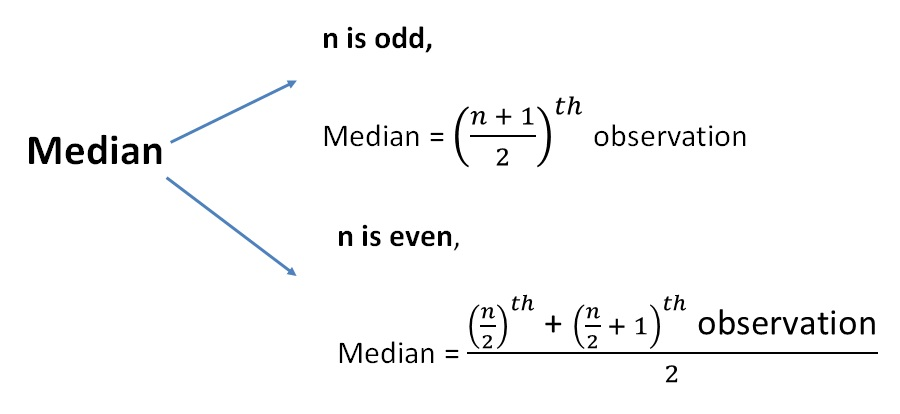

Maaş verilerinde medyan bulmak için maaş serimizi tekrardan hatırlayalım.

In [45]:
salaries

[4500, 4600, 4800, 5000, 5300, 5300, 5500, 5700, 5900, 15000]

In [46]:
len(salaries) / 2

5.0

Medyan bulmadan önce küçükten büyüğe sıralamak gerekiyor, bunun için sıralama algoritmaları yerine hazır fonksiyon olan sort metodunu kullanalım.

In [47]:
salaries.sort()

In [48]:
salaries

[4500, 4600, 4800, 5000, 5300, 5300, 5500, 5700, 5900, 15000]

Eleman sayımızın tek mi çift mi olduğunu inceleyelim.

In [49]:
len(salaries)

10

Çift mi?

In [50]:
len(salaries)%2 == 0

True

Çift olduğuna göre ortadaki iki değerin ortalamasını alarak bulacağız.

In [51]:
int(len(salaries) / 2) # ortadaki değerin indisi

5

Bu indise göre en ortadaki iki değeri gözlemleyelim.

In [52]:
salaries[int(len(salaries) / 2) -1]  # ortadaki ilk değer

5300

In [53]:
salaries[int(len(salaries) / 2)]  # ortadaki ikinci değer

5300

Bu iki değerin ortalamasını alalım.

In [54]:
(salaries[int(len(salaries) / 2)] + salaries[int(len(salaries) / 2) - 1]) / 2

5300.0

Bu işlemi fonksiyon olarak geliştirelim.

In [55]:
def calculate_median(series):
    
    series.sort()
    
    n_series = len(series)
    odd = n_series % 2 == 1

    if odd:
        indice = round(n_series / 2)
        return series[indice]

    else:
        indices = int(n_series / 2) -1, int(n_series / 2)
        return (series[indices[0]] + series[indices[1]]) / 2

In [56]:
calculate_median(salaries)

5300.0

## Mode <a id='mode'></a>

Serimizde en sık tekrar eden yani en büyük frekansa sahip olan elemandır.

In [57]:
salaries

[4500, 4600, 4800, 5000, 5300, 5300, 5500, 5700, 5900, 15000]

Hazır bir fonksiyon ile mod bulma işlemini gerçekleştirebiliriz.

In [58]:
from statistics import mode

mode(salaries)

5300

## Kartiller <a id='kartiller'></a>

İstatistikte ve merkezi eğilim ölçüsünde önemli bir yer tutan kartiller, aynı zamanda quantile, çeyreklik veya dörde bölen olarak isimlendirilebilir.

Kartiller, seri küçükten büyüğe sıralandığında seriyi 4 parçaya ayırmayı hedefler. Formülü aşağıdaki şekildedir ve N serideki eleman sayısını temsil etmektedir.

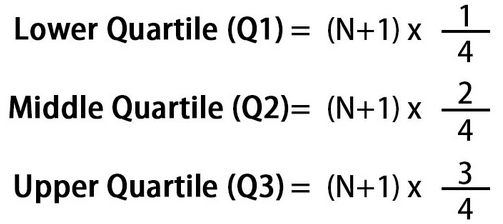

Yaşlardan oluşan bir seri oluşturalım.

In [59]:
ages = [24,28,31,27,26,39,43]
ages

[24, 28, 31, 27, 26, 39, 43]

In [60]:
len(ages)

7

Kartilleri bulmadan önce sıralı bir seriye sahip olmamız gerekir.

In [61]:
ages.sort()

In [62]:
ages

[24, 26, 27, 28, 31, 39, 43]

Bu serimizde Q1 tespit etmeye çalışalım.

In [63]:
n_age = len(ages)
n_age

7

In [64]:
( n_age + 1 ) * 1/4

2.0

Yukarıdaki 2 bir değer değildir, indisi temsil eder. Serideki 2. elemana gidersek bunun Lower Quartile değeri olduğunu görebiliriz.

Dikkat! Saymaya 0 dan başladığımız için ikinci değer aslına 1. indisi temsil etmektedir.

In [65]:
ages[1]

26

Serimizin Q1 değeri yani ilk çeyrekliğin 28 olduğunu gördük.

Bir seriyi parametre olarak alan ve Q1, Q2, Q3 değerlerini geri döndüren bir fonksiyon yazalım.

In [66]:
def calculate_quartile(serie):
    
    serie.sort()
    n_serie = len(serie)
    
    Q1 = int(( n_serie + 1 ) * 1/4) - 1
    Q2 = int(( n_serie + 1 ) * 2/4) - 1
    Q3 = int(( n_serie + 1 ) * 3/4) - 1
    
    return serie[Q1], serie[Q2], serie[Q3]

In [67]:
calculate_quartile(ages)

(26, 28, 39)

In [68]:
ages

[24, 26, 27, 28, 31, 39, 43]

# Dağılım Ölçüleri <a id='dagilimolculeri'></a>

## Ranj (Değişim Aralığı) <a id='ranj'></a>

Bir serideki ranj, seriye ait minimum ve maksimum değerlerin farkını hesaplayarak elde edilir.

In [69]:
ages.sort()
ages

[24, 26, 27, 28, 31, 39, 43]

Sıralanmış bir seride en küçük değer 0. indiste yer alır.

In [70]:
ages[0]

24

En yüksek değer ise sonuncu indiste yer alır.

In [71]:
ages[-1]

43

Ranjı bulmak için farkı hesaplayabiliriz.

In [72]:
ages[-1] - ages[0]

19

In [73]:
def calculate_range(serie):
    
    serie.sort()
    
    return serie[-1] - serie[0]

In [74]:
calculate_range(ages)

19

In [75]:
calculate_range(salaries)

10500

## Standart Sapma <a id='std'></a>

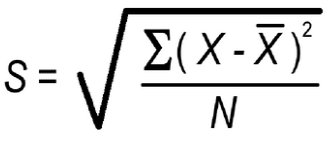

Aşağıda insanların ağırlıklarını tutan bir seri oluşturduk, bu serinin varyansını alalım.

In [76]:
weights = [54,71,78,52,59,96,62,80,58,65]

In [77]:
len(weights)

10

In [78]:
def calculate_std(serie):
    
    mu = calculate_mean(serie)
    
    return np.sqrt(calculate_mean(  [  (i - mu) ** 2 for i in serie  ]   ))

In [79]:
calculate_std(weights)

13.0862523283024

## Varyans <a id='varyans'></a>

Kısaca standart sapmanın karesidir. Standart sapma bulmak için karekök içine alıyorduk, kare alarak karekök içinden çıkan değere varyans denir. Birden fazla değişkenin dağılımlarındaki sapmayı birbiriyle kıyaslamak istediğimizde varyans kullanılabilir, standart sapmanın birimsiz hali gibi düşünülebilir.

In [80]:
def calculate_var(serie):
    
    std = calculate_std(serie)
    
    return std ** 2

In [81]:
calculate_var(weights)

171.25

Bir dağılımdaki değerlerin, ortalamadan olan sapmalarının ölçüsüdür. Formülünde görüldüğü üzere aslında standart sapma bir ortalamadır. Değerlerin ortalamadan olan sapmalarının ortalamasıdır.

## Çarpıklık (Skewness) <a id='carpiklik'></a>

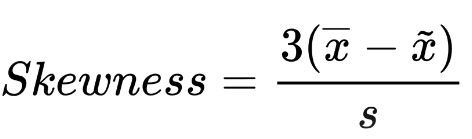

Bir serinin dağılımını histogram olarak çizdirdiğimizde soldan veya sağdan çarpılmışlığın ifadesidir. Skweness olarak literatürde yer bulur. Yukarıda bulunan formül Pearson çarpıklık katsayısını temsil eder.


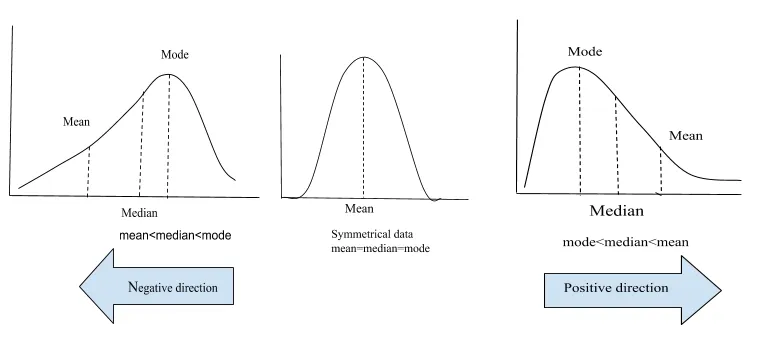

https://alevelmaths.co.uk/statistics/skewness/

Bir dağılım sağdan çarpık, soldan çarpık veya çarpık olmayan simetrik bir ölçüye sahip olmalıdır.

In [82]:
iqs = [44,45,46,47,47,48,48,49,50,50,50,50,51,51,51,51,51,51]

<AxesSubplot:ylabel='Density'>

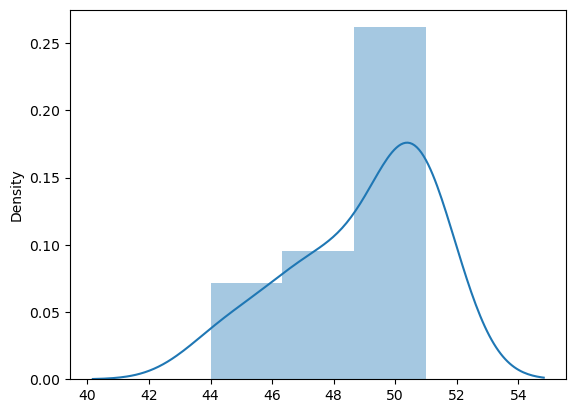

In [88]:
import seaborn as sns
sns.distplot(iqs)

In [85]:
mean_iq = calculate_mean(iqs)
mean_iq

48.888888888888886

In [86]:
median_iq = calculate_median(iqs)
median_iq

50.0

In [89]:
std_iq = calculate_std(iqs)
std_iq

2.208289657150199

Formülü yazalım.

In [90]:
(3 * (mean_iq - median_iq)) / std_iq

-1.5094638162798872

**Çarpıklık kat sayımız -1.509 bulundu. Nasıl yorum yapacağız ?**

Çarpıklık katsayımız 0 ise dağılım simetriktir, normal dağılımdır.

Çarpıklık katsayımız küçüktür 0'dan ise dağılım negatif çarpıktır.

Çarpıklık katsayımız büyüktür 0'dan  ise dağılım pozitif çarpıktır. 

Parametre olarak seri alan ve sonucu açıklamasıyla yazan bir fonksiyon geliştirelim.

In [91]:
def calculate_skew(serie):
    
    mean = calculate_mean(serie)
    median = calculate_median(serie)
    std = calculate_std(serie)
    
    skew = (3 * (mean - median)) / std
    
    if skew < 0:
        result = "negative skewness detected."
        
    elif skew > 0:
        result = "positive skewness detected."
        
    else:
        result = "there is no skewness."
        
    return skew, result

In [92]:
calculate_skew(iqs)

(-1.5094638162798872, 'negative skewness detected.')

Deneme için yeni bir giysi bedenlerinden oluşan dağılımı oluşturalım.

In [93]:
sizes = [40,42,42,44,44,44,46,46,48]

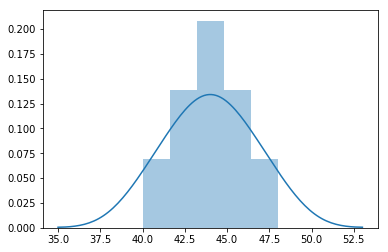

In [56]:
sns.distplot(sizes, bins=5);

Normal dağılım olarak görünen bu dağılımın çarpıklığını hesaplayalım.

In [94]:
calculate_skew(sizes)

(0.0, 'there is no skewness.')

## Basıklık (Kurtosis) <a id='basiklik'></a>

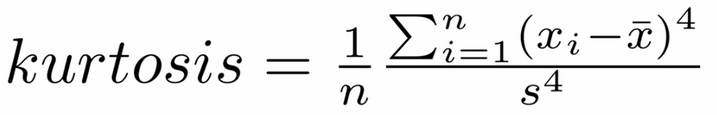

Dağılımların sivriliğini ve basıklığını ölçmemize yarayan kavramdır. Ortalaması aynı olan pek çok dağılımın basıklıkları ve sivrilikleri çok farklı olacağından dolayı basıklığı doğru anlamak ve yorumlamak büyük önem teşkil eder.

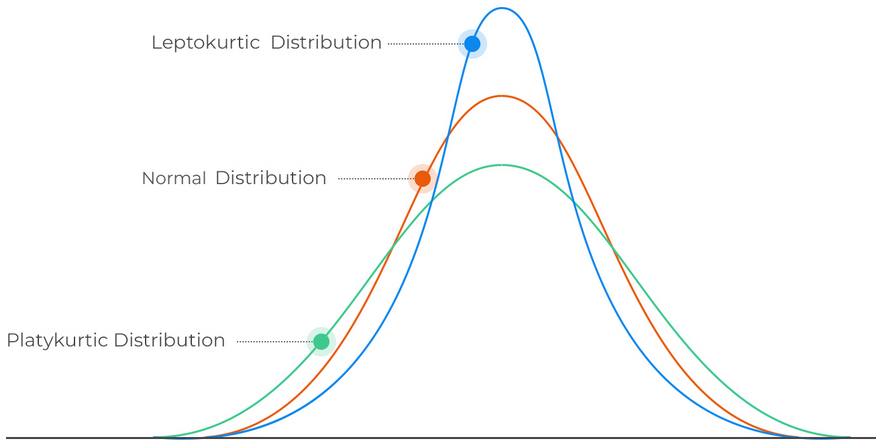

**Basıklık katsayısını nasıl yorumlarız?**

Eğer basıklık katsayısı 3 ise dağılım normaldir.

Eğer basıklık katsayısı 3'den büyük ise dağılım sivridir.

Eğer basıklık katsayısı 3'den küçük ise dağılım basıktır.

In [95]:
def calculate_kurtosis(serie):
    
    mean = calculate_mean(serie)
    n_serie = len(serie)
    total = 0

    for i in serie:
        temp = (i - mean) ** 4
        total += temp
        
    momentum_4 = total / n_serie

    std = calculate_std(serie)
    std_4 = std ** 4

    result = momentum_4 / std_4

    if result == 3:
        return result, "Standart normal distribution"

    elif result > 3:
        return result, "Leptokurtic distribution"

    else:
        return result, "Platykurtic distribution"

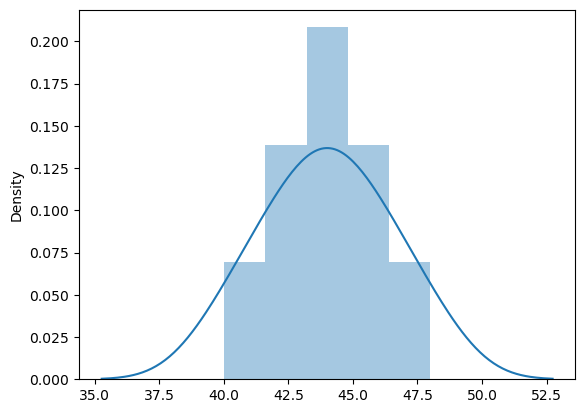

In [96]:
sns.distplot(sizes, bins=5);

In [97]:
calculate_kurtosis(sizes)

(2.2500000000000004, 'Platykurtic distribution')

# Dağılım İlişkileri ve Betimsel İstatistik <a id='dagilimiliskileri'></a>

## Korelasyon <a id='korelasyon'></a>

İki değişken arasında ilişki olup olmadığını, ilişkinin yönünü, ilişkinin kuvvetini veren tekniktir.

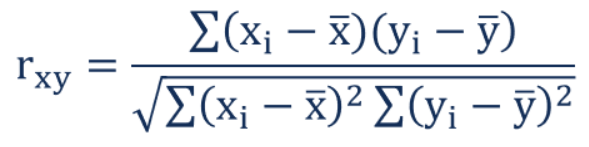

8 çocuğa ait boy(cm) ve ağırlık(kg) değerlerini oluşturalım.

In [98]:
heights = [140,142,144,149,152,152,156, 158]
weights = [32,32,36,36,40,38,44,46]

Boy değerlerini y ekseninde, ağırlık değerlerini x ekseninde olacak şekilde görselleştirelim.

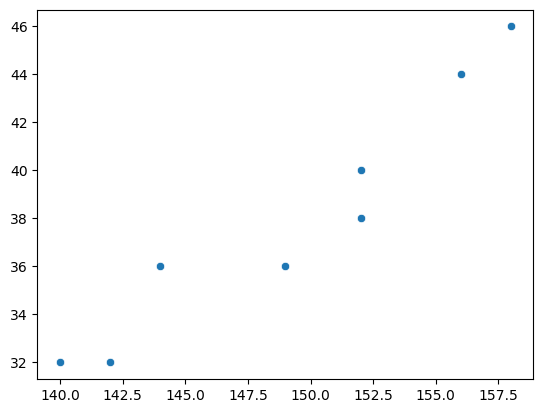

In [99]:
sns.scatterplot(heights, weights);

İki değişkenin korelasyon katsayısını inceleyelim.

In [100]:
pd.Series(heights).corr(pd.Series(weights))

0.9573435465851121

Korelasyon katsayısını elde ettik, peki bunu nasıl yorumlamalıyız?

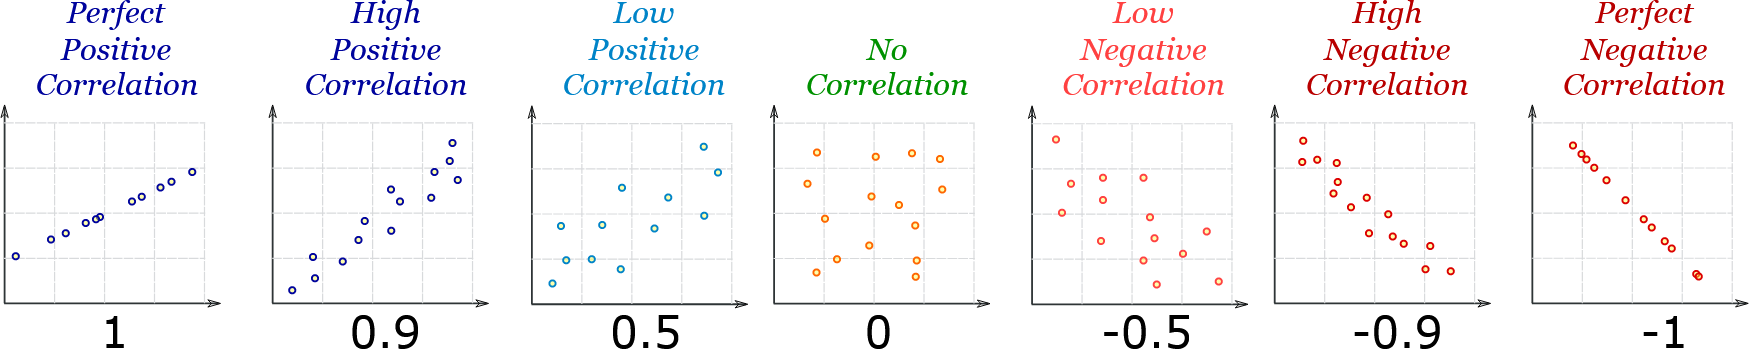

## Kovaryans <a id='kovaryans'></a>

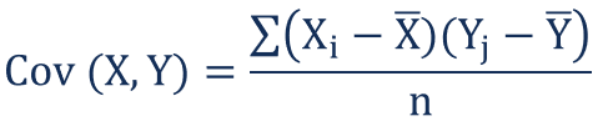

İki değişken arasındaki ilişkinin değişkenlik ölçüsüdür.

Korelasyon örneğindeki çocuklara ait boy ve ağrlıkların kovaryansını gözlemleyelim.

In [101]:
pd.Series(heights).cov(pd.Series(weights))

32.285714285714285

Eğer seriler arasında bir değişim olmasaydı, kovaryans ne olurdu?

In [103]:
x = [1,1,1,1,1,1,1,1,1]
y = [2,2,2,2,2,2,2,2,2]

pd.Series(x).cov(pd.Series(y))

0.0

## Güven Aralığı (Confidence Interval) <a id='guven'></a>

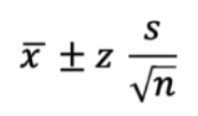

Confidence Interval olarak bilinen güven aralıkları bir dağılımı istediğimiz oranda güvenilirlikle açıklamak için iki adet sınır değeri verir. 

1.000 adet Instagram kullanıcısının instagram üzerinden verilen bir reklamı incelemek için zaman tünelinde durup ayırdıkları vakti saniye cinsinden sentetik olarak üretelim.

In [105]:
mu, sigma = 8, 3 # mean and standard deviation

ad_timespan = np.random.normal(mu, sigma, 1000) 

İlk 50 kişinin ayırdığı vakti görüntüleyelim.

In [106]:
ad_timespan[:50]

array([13.73803355,  6.49908856,  4.45611156,  6.26457501,  4.61136538,
        6.2431807 ,  4.91402117,  5.16345271,  7.65701608,  8.62736828,
       14.62592252,  6.99486731,  2.95091691,  5.93986151, 10.2200121 ,
        7.63555622,  3.07355667,  7.46593983, 10.93895574,  9.65158825,
        7.33503675,  8.45079262,  5.31942903,  7.35022949,  8.56457422,
        8.2568348 ,  9.44435992,  1.44108399,  6.93866952,  8.59446904,
        8.57677559,  4.83244478,  7.2786572 ,  6.16761264,  4.24881557,
        8.33239503,  8.25074524,  6.39116728, 15.02219934,  5.95433378,
        2.13625586,  5.73279751,  8.76458918,  3.27364326,  8.28228076,
        4.81890355, 10.52940034,  9.95974131, 11.4022467 , 14.32435744])

Eğer daha büyük kitleler için reklam vereceksek neleri bilmeiz gerekioyr?

In [107]:
ad_timespan.mean()

7.871010537769076

In [108]:
ad_timespan.std()

2.9207228137804333

Normal dağılım oluşturduk, görselleştirerek bunu teyit edelim.

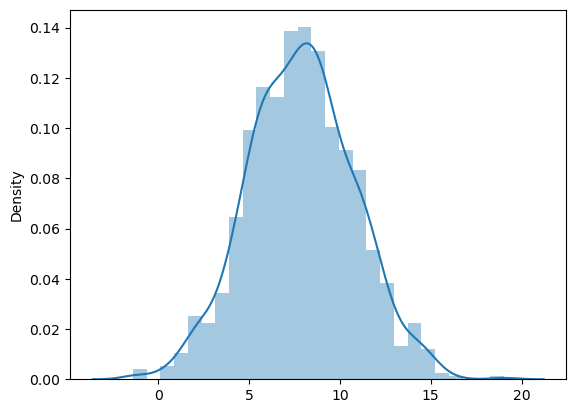

In [109]:
sns.distplot(ad_timespan);

Eğer güven aralığı olarak %95 ile reklam verdiğimizde kullanıcıların ne kadarının kaç saniye duracağını tahmin etsek?

Standart normal bir rassal değişkenin -1.96 ile 1.96 arasında olma olasılığı 0.95 şeklindedir.

In [110]:
print(  ad_timespan.mean() - 1.96 * (ad_timespan.std() / np.sqrt(len(ad_timespan))), " - ",
      ad_timespan.mean() + 1.96 * (ad_timespan.std() / np.sqrt(len(ad_timespan))))

7.689982262260061  -  8.052038813278092


Eğer daha büyük bir kitle için reklam verme kararı alırsak, istatistiksel çıkarımımıza göre %95 güvenilirlikle insanlar bu reklam için 8.09 ile 7.72 saniye arasında zaman ayıracaklardır. Bu çıkarımda bulunmadan alınan reklamlar ve kampanyalar veriye odaklı olmayacaktır.

# Kitle Analizi <a id='kitle'></a>

## Popülasyon <a id='populasyon'></a>

İlgilenilen ana kitledir. Türkiye üzerinde bir anket çalışması yapmak istediğimizde Türkiye'de yaşayan herkes popülasyonu temsil edecektir.

Türkiye'de yaşayan herkesin yaşına sahip olduğumuzu düşünelim, 82 milyon yaş verisini sentetik olarak üretelim.

In [112]:
tr_population_avg_age = np.random.randint(1, 70, 82000000)

İlk 10 yaş değerini gözlemleyelim.

In [113]:
tr_population_avg_age[:10]

array([39, 20, 38,  2, 17, 59, 16, 13, 37, 24])

Yapacağımız bir anket çalışması için tüm insanlara ulaşmamız, herkesin demografik bilgilerini temin etmemiz elbette mümkün değildir veya oldukça maliyetli ve vakit alıcıdır. Bu gibi durumlarda popülasyonu temsil ettiğini düşündüğümüz yansız bir örneklem kitlesi temin edilir.

## Örneklem <a id='orneklem'></a>

Örneklem, popülasyonu temsil edeceğini düşündüğümüz yansız şekilde seçilmesi gereken popülasyonun alt kitlesidir.

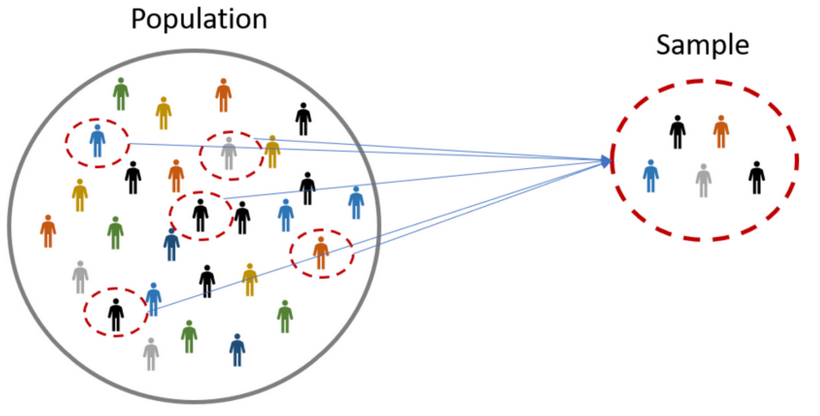

Python'da bu örneklem kitleyi rassal şekilde nasıl temin edebiliriz ?

In [114]:
sample_avg_age = np.random.choice(a = tr_population_avg_age, size = 10000)
sample_avg_age[:10]

array([20, 32, 16, 16, 54, 56, 30, 25, 27, 10])

82 milyon adet yaş verisini barındıran ana kitlemizden rassallıkla 10.000 adet kişinin yaşını çektik. Peki çektiğimiz örneklem kitlesi, ana kitleyi yansıtıyor mu?

Ana kitleyi görselleştirelim.

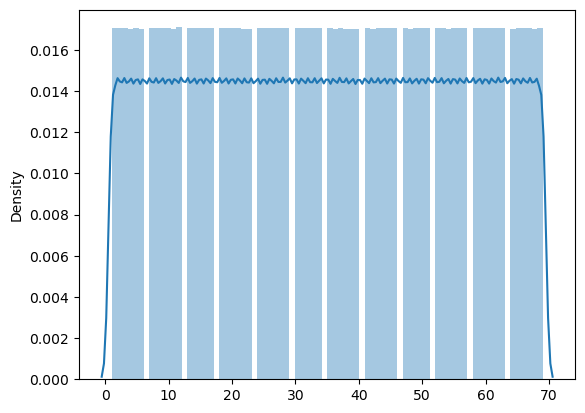

In [115]:
sns.distplot(tr_population_avg_age, bins = 80);

Örneklem kitleyi görselleştirelim.

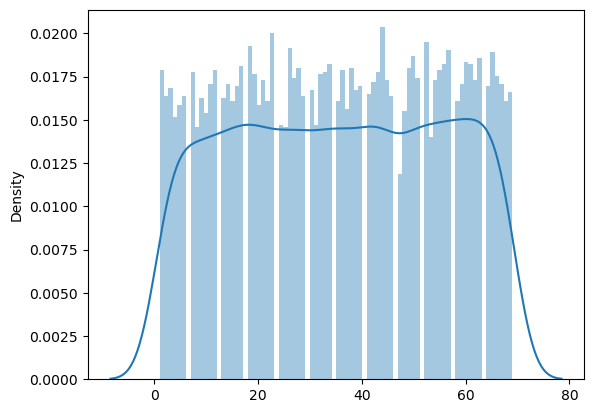

In [116]:
sns.distplot(sample_avg_age, bins = 80);

Grafikler oldukça birbirine benzer sonuçlar veriyor. Peki merkezi eğilim ölçüleri nasıl?

Örneklem kitlenin ve ana kitlenin ortalamalarını karşılaştıralım.

In [117]:
sample_avg_age.mean()

35.3229

In [118]:
tr_population_avg_age.mean()

35.00136679268293

Örneklem kitlenin ve ana kitlenin medyan değerlerini karşılaştıralım.

In [119]:
np.median(sample_avg_age)

35.0

In [120]:
np.median(tr_population_avg_age)

35.0

Örneklem kitlenin ve ana kitlenin standart sapma değerlerini karşılaştıralım.

In [121]:
np.std(sample_avg_age)

19.887836372768156

In [122]:
np.std(tr_population_avg_age)

19.91650677380198

Başarının hassasiyeti göreceli olmakla birlikte, örneklem kitleyi rassallıkla mümkün mertebe yansız şekilde çektiğimiz görülüyor. 

## Merkezi Limit Teoremi Örnek <a id='merkezilimit'></a>

Merkezi limit teoreminin altında yatan temel prensip uygun bir şekilde seçilen büyük bir örneklemin seçildiği popülasyona benzeyeceğidir. Eğer elimizde uygun şekilde seçilmiş örneklemle ilgili detaylı bir bilgi (ortalama ve standart sapma) varsa bu örneklemin içinden alındığı popülasyonla ilgili kesin ve doğru çıkarımlarda bulunabiliriz. **(Wheelan,Çıplak İstatistik)**

Oluşturduğumuz 82 milyon adetlik yaş barındıran veri setinden 7 adet 10.000 elemanlık rastgele örneklem seçelim.

In [84]:
sample_1 = np.random.choice(a = tr_population_avg_age, size = 10000)
sample_2 = np.random.choice(a = tr_population_avg_age, size = 10000)
sample_3 = np.random.choice(a = tr_population_avg_age, size = 10000)
sample_4 = np.random.choice(a = tr_population_avg_age, size = 10000)
sample_5 = np.random.choice(a = tr_population_avg_age, size = 10000)
sample_6 = np.random.choice(a = tr_population_avg_age, size = 10000)
sample_7 = np.random.choice(a = tr_population_avg_age, size = 10000)

Ana kitlemizin ortalamasını ve medyan değerlerini hatırlayalım.

In [83]:
tr_population_avg_age.mean(), np.median(tr_population_avg_age)

(35.002823792682925, 35.0)

Bir adet örneklem gözlemleyelim.

In [84]:
sample_1

array([54, 40, 17, ..., 44, 31, 42])

Rastgele olarak seçilmiş 10.000 adet yaştan oluşan 7 örneklemin ortalamasını bulduğumuzda ana kitlenin ortalamasını verecektir.

In [85]:
((sample_1 + sample_2 + sample_3 + sample_4 + sample_5 +  sample_6 + sample_7) / 7).mean()

34.9371

### Gözlem Birimi ve Öznitelik(Değişken) <a id='gozlem'></a>

Örneklem kümesindeki her kişi bir gözlem birimidir. Veri setlerindeki satırlar genelde gözlem birimleri olarak ifade edilir.

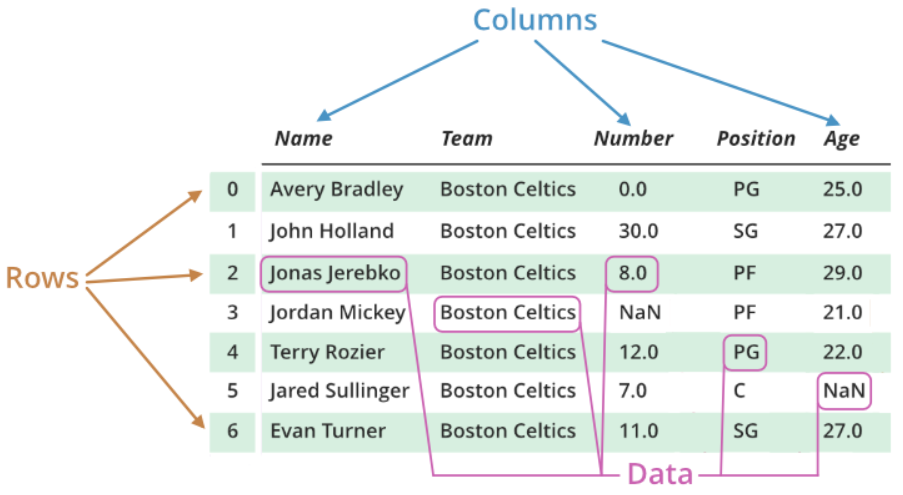